In [1]:
import numpy as np
import pystan
%matplotlib inline
import matplotlib.pylab as plt

In [2]:
from pkg_resources import get_distribution
import platform
print("python", platform.python_version())
print("")
libs = ["numpy", "matplotlib", "pystan"]
for lib in libs:
    version = get_distribution(lib).version
    print(lib, version)

python 3.5.2

numpy 1.13.1
matplotlib 2.0.2
pystan 2.16.0.0


In [3]:
# データ作成
N = 10
x_samples, y_samples = [], []
for i in range(N):
    x = round(np.random.rand()*4+3, 1) # 3.0〜7.0までの乱数
    mu = np.exp(1.5+0.1*x) # ポアソン分布の平均
    y = np.random.poisson(mu)
    x_samples.append(x)
    y_samples.append(y)
print(x_samples)
print(y_samples)

[3.9, 6.2, 5.8, 3.1, 6.0, 4.7, 5.1, 5.6, 5.3, 6.2]
[4, 5, 8, 7, 10, 6, 4, 4, 6, 11]


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8ab8d0d805ce1bc0a8cf7cf36a84bc81 NOW.


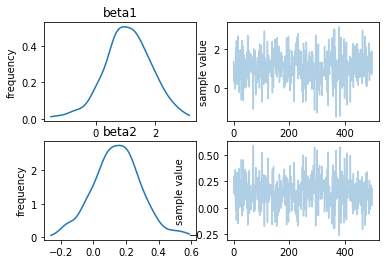

In [4]:
# 統計モデル、Stanコードで記述する
stan_data = {'N': N, 'x': x_samples, 'y': y_samples}
model = """
data {
    int<lower=1>N;
    vector[N] x;
    int<lower=0> y[N];
}
parameters {
    real beta1;
    real beta2;
}
model {
    for (i in 1:N){
        y[i] ~ poisson(exp(beta1+beta2*x[i]));
    }
    beta1 ~ normal(0, 1000);
    beta2 ~ normal(0, 1000);
}
"""
fit = pystan.stan(model_code=model, data=stan_data, iter=1000, chains=1)
fit.plot()
plt.show()